<a href="https://colab.research.google.com/github/PatGeorgian/Patrick.Odita.BDAT1004PS-2/blob/main/Mnist_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Random Forest...
Random Forest - Accuracy: 0.9672, F1-score: 0.9669
Training Linear SVM...
Linear SVM - Accuracy: 0.9241, F1-score: 0.9231

Model Performance:
               Accuracy  F1-score
Random Forest  0.967214  0.966944
Linear SVM     0.924071  0.923091

Saved best model: Random Forest


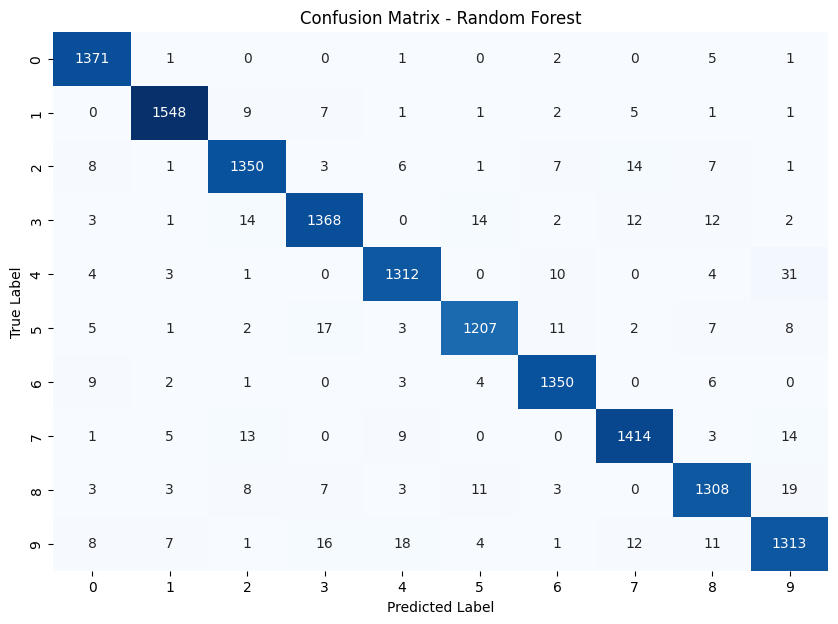

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import joblib

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# Convert data to numpy arrays and labels to integers
X = X.to_numpy()
y = y.astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize pixel values to range [0,1] using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler for future use
joblib.dump(scaler, "mnist_scaler.pkl")

# Use efficient models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Linear SVM": SVC(kernel='linear', C=10, random_state=42)  # More efficient linear kernel
}

# Train models and evaluate
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    results[name] = {"Accuracy": acc, "F1-score": f1}

    print(f"{name} - Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

# Display results in a table
results_df = pd.DataFrame(results).T
print("\nModel Performance:")
print(results_df)

# Save the best model
best_model_name = max(results, key=lambda k: results[k]["F1-score"])
joblib.dump(models[best_model_name], "mnist_best_model.pkl")
print(f"\nSaved best model: {best_model_name}")

# Confusion matrix for the best model
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()